In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

In [2]:
import razor_data
import toy_data
import plotting
import gp
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

### Impact of binning choice

We fit the Multijet 1b category in a restricted range previously, to avoid the regime where the Gaussian approximation to the Poisson breaks.  Test how we do if we expand to a wider range and different numbers of bins.

In [11]:
def get_data(box, btags, num_mr_bins, mr_max):
    binned_data = razor_data.get_binned_data_1d(
            num_mr_bins=num_mr_bins, mr_max=mr_max)
    test_data = binned_data[box][btags]
    return test_data

def fit_and_plot(box, btags, num_mr_bins, mr_max, kernel):
    data = get_data(box, btags , num_mr_bins, mr_max)
    U = data['u']
    Y = data['y']
    G = gp.GaussianLikelihoodGP(kernel, U, Y)
    G.fit()
    plotting.plot_hist_1d(data, G=G)
    plotting.plot_nsigma_1d(data, G, use_poisson_noise=True)
    return G

Best-fit parameters:  321.66 323352.59


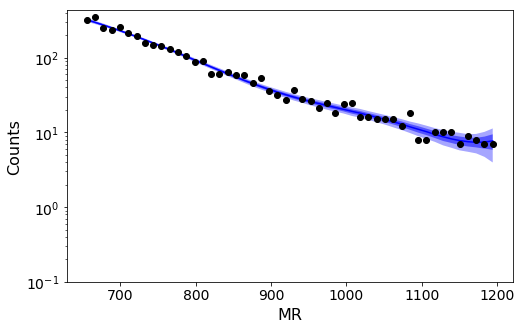

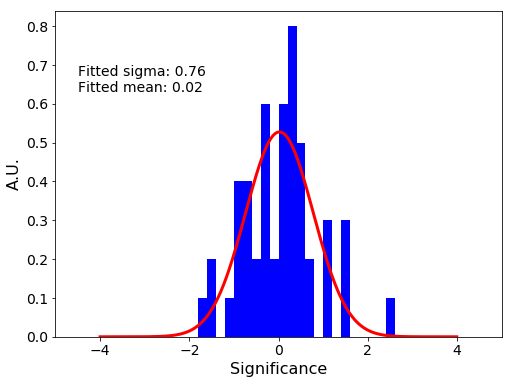

In [13]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 50, 1200, kernel)

Best-fit parameters:  226.88 15085.39


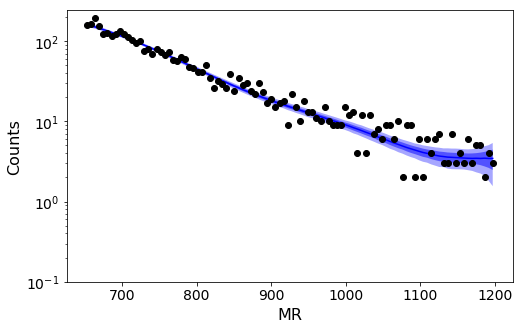

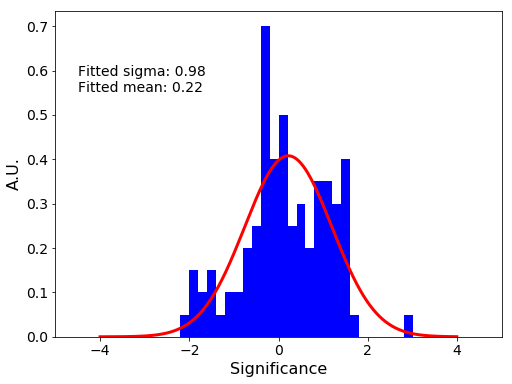

In [14]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 100, 1200, kernel)

Best-fit parameters:  65.02 1993.49


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


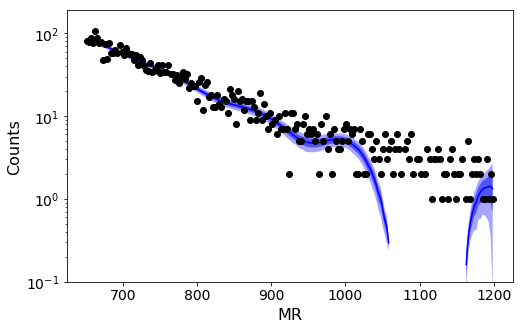

Error: at least one nsigma is infinite


/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:21: RuntimeWarning: invalid value encountered in less
  p = (samples < y).sum(0) / num_samples


In [15]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 200, 1200, kernel)

Best-fit parameters:  334.92 379664.41


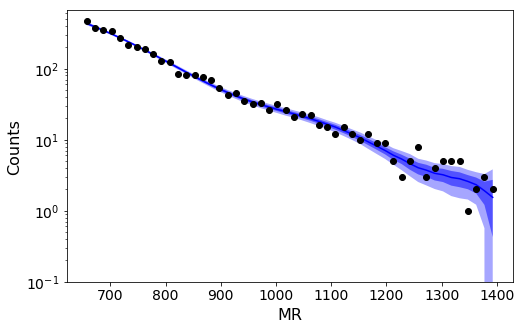

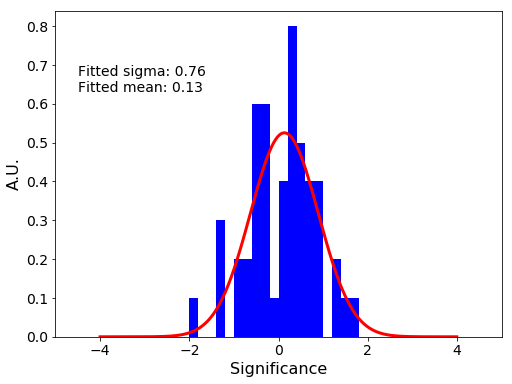

In [17]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 50, 1400, kernel)

Best-fit parameters:  253.47 33074.57


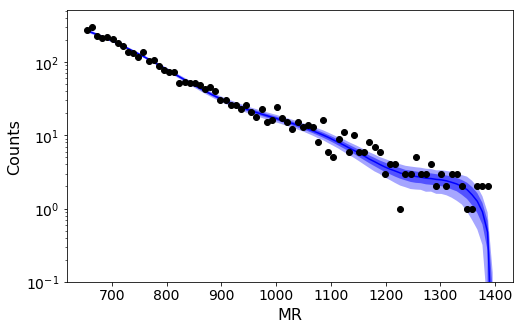

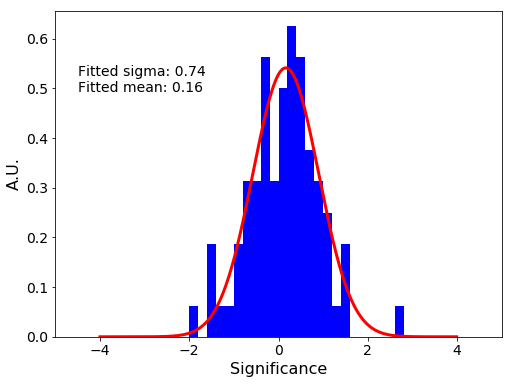

In [27]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 80, 1400, kernel)

Best-fit parameters:  103.91 3683.96


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


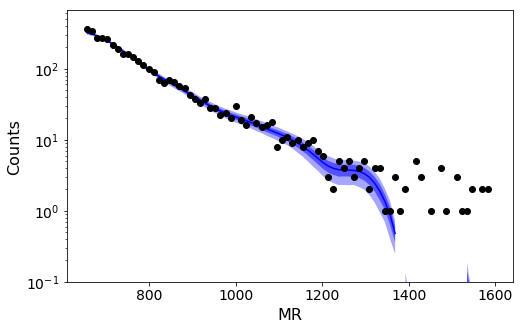

Error: at least one nsigma is infinite


/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:21: RuntimeWarning: invalid value encountered in less
  p = (samples < y).sum(0) / num_samples


In [28]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 80, 1600, kernel)

Best-fit parameters:  203.88 80239.44


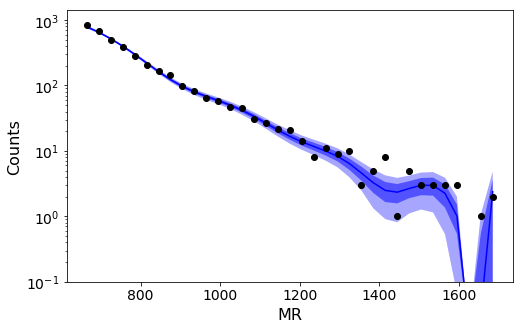

Error: at least one nsigma is infinite


In [38]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 35, 1700, kernel)

Best-fit parameters:  167.27 1655.54


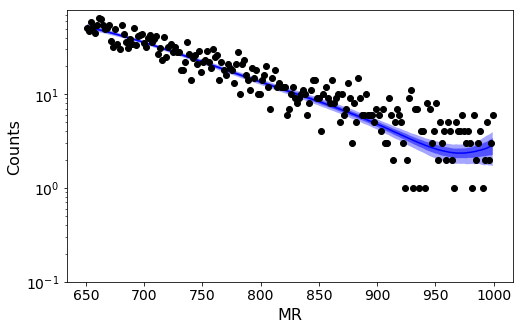

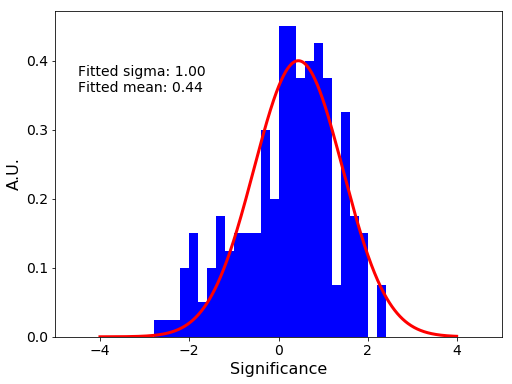

In [39]:
kernel = gp.SquaredExponentialKernel(100, 2000)
G = fit_and_plot('MultiJet', 1, 200, 1000, kernel)

### Fit each analysis box

DiJet 0b
Best-fit parameters:  140.25 1830.56


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


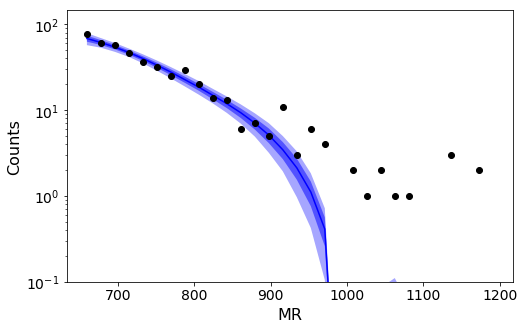

Error: at least one nsigma is infinite
DiJet 1b


/nfshome/duanders/gpu-3-imperium/data/MLPhysics/razor_fits/gp/plotting.py:21: RuntimeWarning: invalid value encountered in less
  p = (samples < y).sum(0) / num_samples


Best-fit parameters:  116.03 2056.37


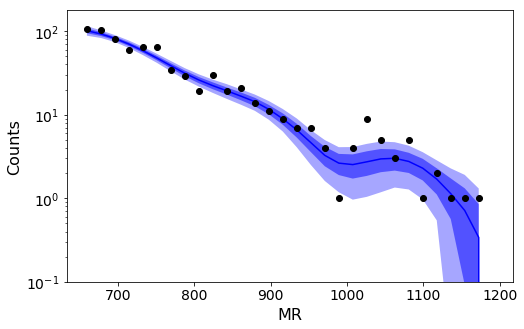

Error: at least one nsigma is infinite
DiJet 2b
Best-fit parameters:  305.06 2425.22


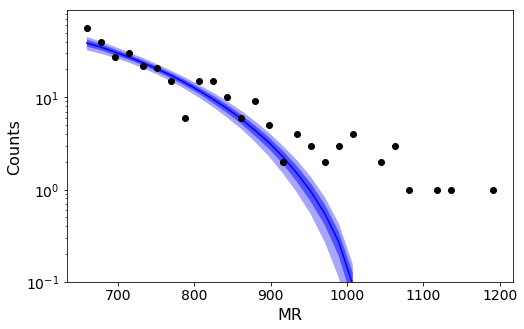

Error: at least one nsigma is infinite
MultiJet 0b
Best-fit parameters:  203.34 40993.79


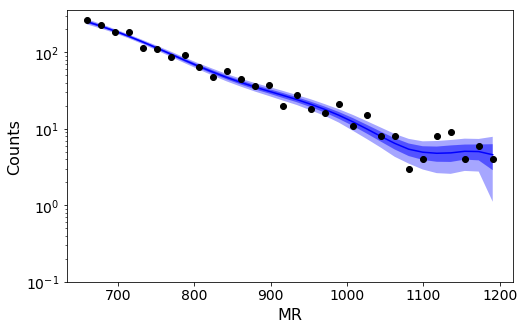

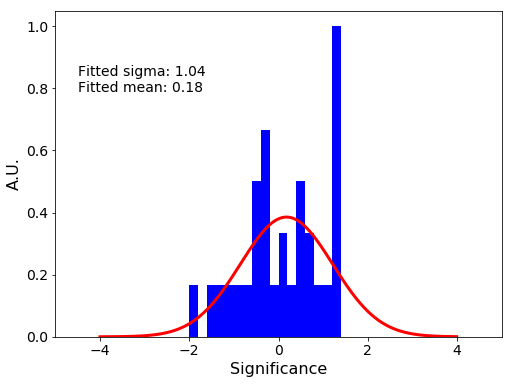

MultiJet 1b
Best-fit parameters:  226.88 15085.39


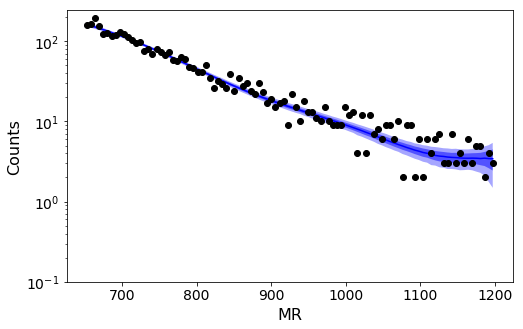

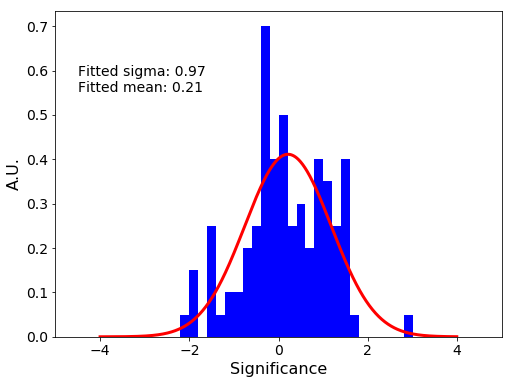

MultiJet 2b
Best-fit parameters:  492.96 1454710.00


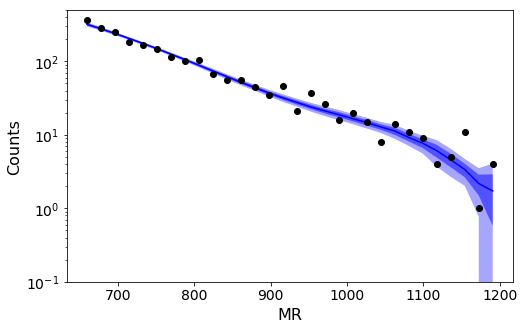

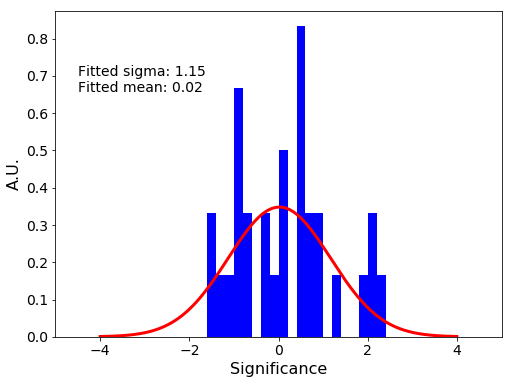

MultiJet 3b
Best-fit parameters:  169.98 280.58


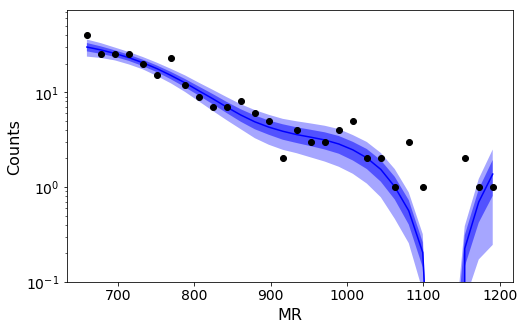

Error: at least one nsigma is infinite
SevenJet 0b
Best-fit parameters:  62.86 64.78


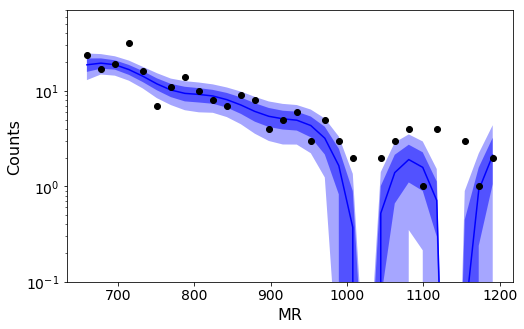

Error: at least one nsigma is infinite
SevenJet 1b
Best-fit parameters:  154.99 999.78


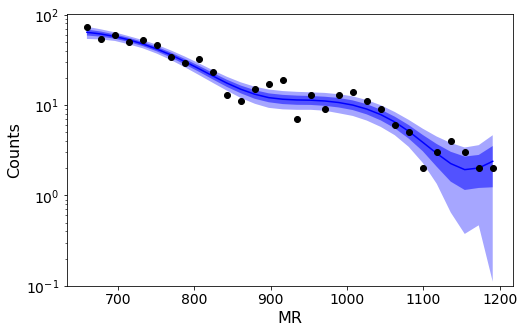

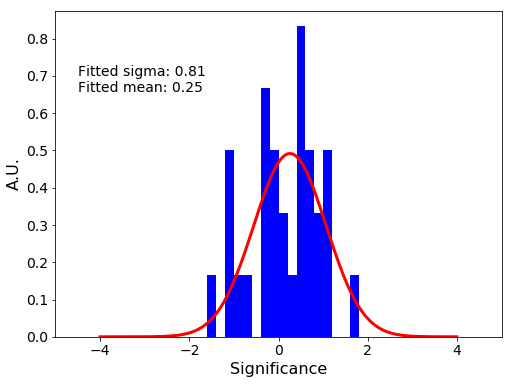

SevenJet 2b
Best-fit parameters:  226.79 1486.91


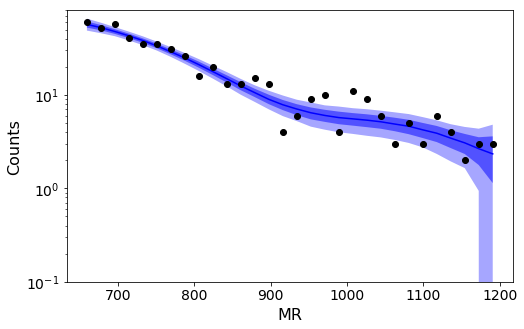

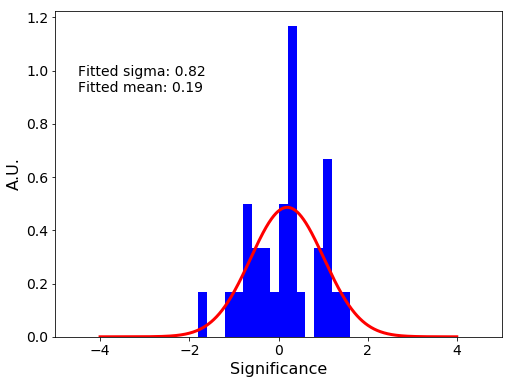

SevenJet 3b
Best-fit parameters:  41.71 17.29


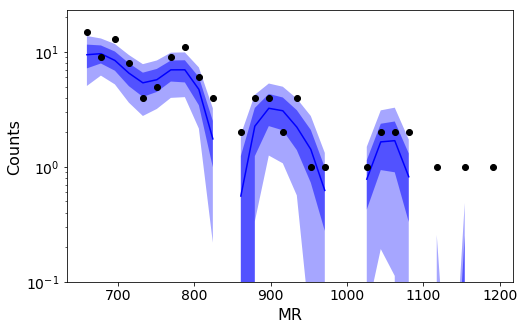

Error: at least one nsigma is infinite
LeptonMultiJet 0b
Best-fit parameters:  2227337216.00 70.53


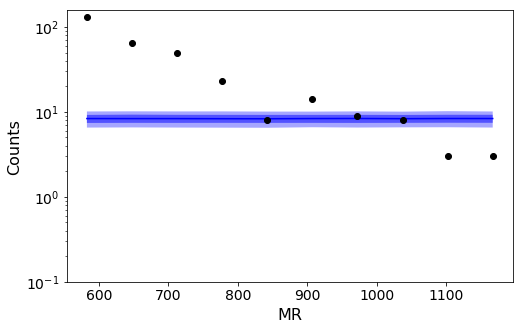

Error: at least one nsigma is infinite
LeptonMultiJet 1b
Best-fit parameters:  294.23 12066.96


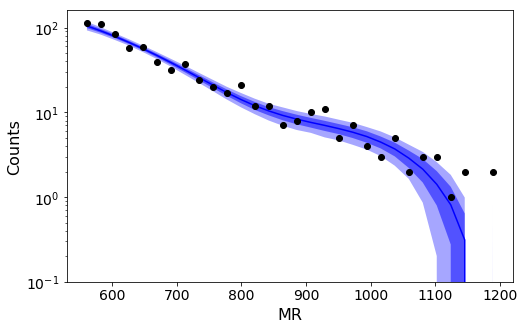

Error: at least one nsigma is infinite
LeptonMultiJet 2b
Best-fit parameters:  145.06 1088.75


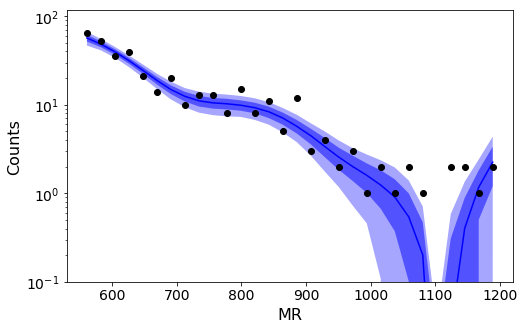

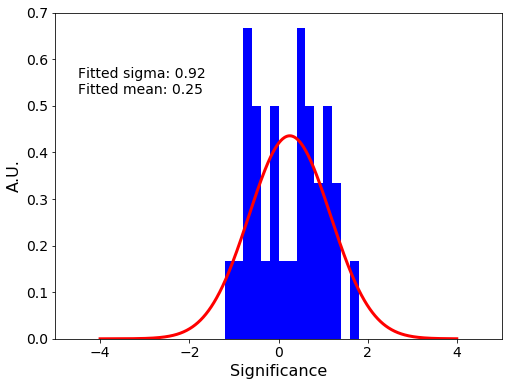

LeptonMultiJet 3b
Best-fit parameters:  473.01 64.41


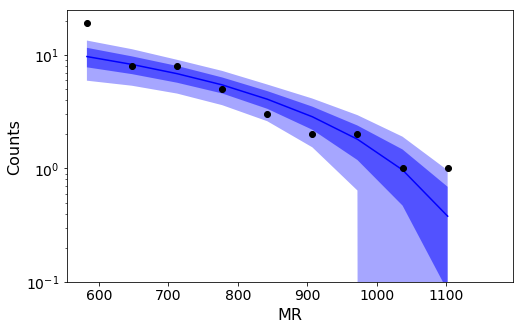

Error: at least one nsigma is infinite


In [46]:
for box in razor_data.get_boxes():
    if box == 'LeptonSevenJet': continue
    for nb in razor_data.get_btag_bins(box):
        print("{} {}b".format(box, nb))
        kernel = gp.SquaredExponentialKernel(100, 2000)
        try:
            G = fit_and_plot(box, nb, 100, 1200, kernel)
        except RuntimeError:
            try:
                G = fit_and_plot(box, nb, 30, 1200, kernel)
            except RuntimeError:
                G = fit_and_plot(box, nb, 10, 1200, kernel)

It works best in boxes with high event counts, where the Gaussian approximation to the likelihood is good.  We should now move to a GP with a Poisson likelihood, which should more naturally handle these low-count cases.